## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[333]

8

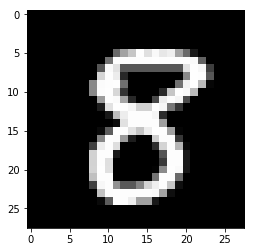

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
# We will build a model with two hidden layers of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [14]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.5194 - acc: 0.8451 - val_loss: 0.2103 - val_acc: 0.9382
Epoch 2/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2618 - acc: 0.9223 - val_loss: 0.1634 - val_acc: 0.9491
Epoch 3/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.2108 - acc: 0.9373 - val_loss: 0.1273 - val_acc: 0.9614
Epoch 4/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.1799 - acc: 0.9470 - val_loss: 0.1181 - val_acc: 0.9656
Epoch 5/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.1622 - acc: 0.9527 - val_loss: 0.1073 - val_acc: 0.9686
Epoch 6/30
60000/60000 [==============================] - 8s 130us/step - loss: 0.1490 - acc: 0.9557 - val_loss: 0.1084 - val_acc: 0.9687
Epoch 7/30
60000/60000 [==============================] - 8s 132us/step -

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10188157208789635
Test accuracy: 0.9751


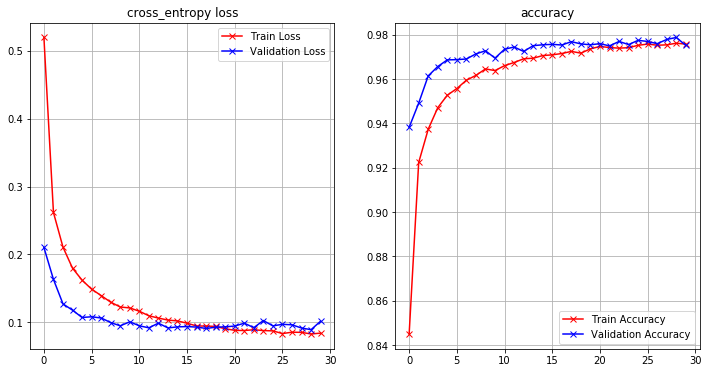

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [17]:
### Build your model here

# We will build a model with two hidden layers of size 400 and 300
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [18]:
# Let's compile the model
learning_rate = .001
batch_size = 128  # mini-batch with 128 examples
epochs = 20

In [19]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

## SOLUTION

In [20]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [21]:

history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.3281 - acc: 0.8994 - val_loss: 0.1285 - val_acc: 0.9597
Epoch 2/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.1507 - acc: 0.9559 - val_loss: 0.0972 - val_acc: 0.9701
Epoch 3/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.1176 - acc: 0.9651 - val_loss: 0.0891 - val_acc: 0.9742
Epoch 4/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.1001 - acc: 0.9711 - val_loss: 0.0783 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.0909 - acc: 0.9739 - val_loss: 0.0829 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.0830 - acc: 0.9760 - val_loss: 0.0798 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0787 - acc: 0.9782 - val_loss: 0.

In [22]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10171181259335703
Test accuracy: 0.9827


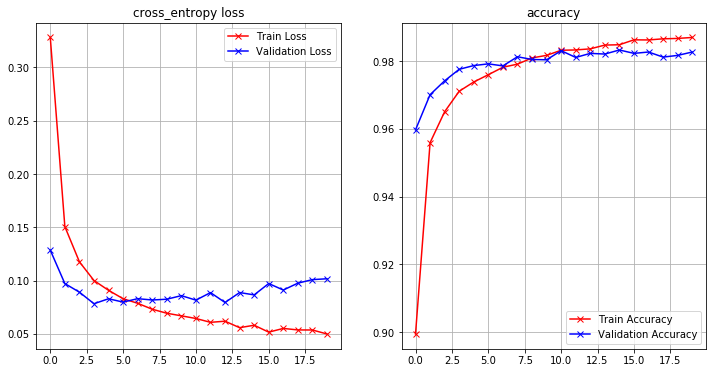

In [23]:
plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

## Question 1

Model 2 is a better model as it improves test accuracy by 0.0076 . I would choose model 1 for production because it's a simpler model as model 2 has about 8x more parameters which may not justify the small increase in performance. If speed and computational efficiency is important under production environment then a simpler model might be more beneficial. 

## Question 2

We can observe that the trajectory of the loss function decreses almost monotonically for both models on the training set but on the test set we see that after a certain iteration the loss increases for model 2. This can be an idication of overfitting for model 2.

We see a similar story for accuracy where it increases monotically on the training set but the test set suggests overfitting for model 2.

Loss is more general than accuracy since by chance we can 100% predict labels for a set of data points. However, the loss function better measures the ability for forecasting how well our model will perform. We can argue that the loss function is more meaningful sense it has a more general indication of how well our model will perform on truly new data points.

## Question 3

One simple hypothesis is to increase the number of epochs to see if more iterations will further improve performance and slightly increase learning rate to see if that helps optimize the loss function. 

Another idea is to change the architecture to a CNN since we are dealing with image data and CNN takes advantage of spacial locality of pixels.


In [41]:
## Question 3

### Build your model here

# We will build a model with two hidden layers of size 400 and 300
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
# Let's compile the model
learning_rate = .002
batch_size = 128  # mini-batch with 128 examples
epochs = 30

model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))


model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.3084 - acc: 0.9046 - val_loss: 0.1155 - val_acc: 0.9658
Epoch 2/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.1594 - acc: 0.9546 - val_loss: 0.0946 - val_acc: 0.9730
Epoch 3/30
60000/60000 [==============================] - 18s 305us/step - loss: 0.1322 - acc: 0.9634 - val_loss: 0.0921 - val_acc: 0.9745
Epoch 4/30
60000/60000 [==============================] - 18s 294us/step - loss: 0.1194 - acc: 0.9679 - val_loss: 0.0966 - val_acc: 0.9765
Epoch 5/30
60000/60000 [==============================] - 17s 291us/step - loss: 0.1174 - acc: 0.9699 - val_loss: 0.0939 - val_acc: 0.9787
Epoch 6/30
60000/60000 [==============================] - 18s 293us/step - loss: 0.1084 - acc: 0.9717 - val_loss: 0.0945 - val_acc: 0.9792
Epoch 7/30
60000/60000 [==============================] - 18s 308us/step - loss: 0.1075 - acc: 0.9738 - val_loss: 0.

In [42]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1289933815142205
Test accuracy: 0.9819


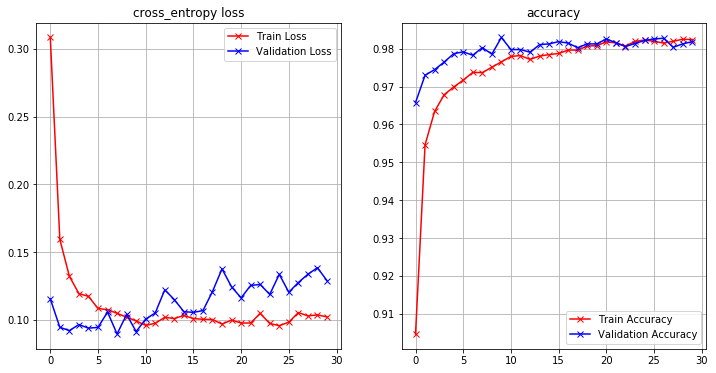

In [43]:
plot_loss_accuracy(history)

Our new proposed model did not improve performance, in fact it slightly decreases accuracy and increased the loss. This can be attributed to the fact the learning rate might have been to aggressively increased.